In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
raw_car_data = pd.read_csv('/content/drive/MyDrive/DATA/car_prices.csv', error_bad_lines=False)
###+==============================lets drop rowes we dont need=========================================================================
raw_car_data = raw_car_data.drop(['vin', 'mmr'], axis=1)
#===============================lets take out dupucules ============================================================
duplicate_rows_raw_car_data = raw_car_data[raw_car_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_raw_car_data.shape)
print(duplicate_rows_raw_car_data.isnull().sum())  
#----------------------Lets get so idea of wht this looks loike by printing the head ----------------------------------------------
raw_car_data
#================== looks like there is some NA that need to be drooped=============================
#========= Remove vaules that are NA/NaN un able to replace 0 with Unknow-----------------------------
raw_car_data.make.fillna("Unknow", inplace=True)
raw_car_data.model.fillna("Unknow", inplace=True)
# ####=======================lets sort by year=========================================================
sorted_year = raw_car_data.sort_values(by='year', ascending=True)
sorted_year.head(n=100)
#=---------------------------------------change the names to clean up the data--------------------------------------------
raw_car_data.make.replace({"Chev truck": "Chevrolet", "Dodge TK": "Dodge","ford":"Ford", "Ford TK": "Ford", "Ford Truck": "Ford", "GMC Truck": "GMC", "Hyundai TK":"Hyundai", "landrover": "Land Rover", "Mazda TK": "Mazda", "Mercedes-B": "Merceded", "Mercedes Benz": "Mercedes", "Scion": "Toyota", "Vw": "Volkswagen"})
sorted_year.head(n=100)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

number of duplicate rows:  (0, 14)
year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
dtype: int64


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,saledate
530870,1982,Unknow,Unknow,NaN,NaN,automatic,pa,4.0,18404.0,white,gray,adcock brothers inc,20500,Thu Jun 11 2015 02:00:00 GMT-0700 (PDT)
207920,1982,Unknow,Unknow,NaN,NaN,automatic,ca,2.0,85738.0,gold,gray,livermore toyota and livermore scion,5000,Wed Jan 28 2015 04:30:00 GMT-0800 (PST)
368682,1983,Unknow,Unknow,NaN,NaN,automatic,fl,3.0,42697.0,black,tan,coconut creek auto mall,5250,Thu Feb 26 2015 03:35:00 GMT-0800 (PST)
102085,1984,Unknow,Unknow,NaN,NaN,automatic,fl,1.0,122136.0,blue,gray,d&a fine cars,2600,Tue Feb 10 2015 01:20:00 GMT-0800 (PST)
78404,1984,chevrolet,corvette,NaN,NaN,automatic,md,2.0,46891.0,black,black,darcars chrysler jeep of rockville,3100,Tue Jan 06 2015 01:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41337,1990,chevrolet,1500,4x2 ext base,NaN,NaN,mo,NaN,156215.0,white,—,animal protective association of missouri,800,Mon Dec 22 2014 11:00:00 GMT-0800 (PST)
459991,1990,Honda,Accord,LX,Sedan,automatic,pa,2.0,152307.0,red,beige,purple heart,300,Tue May 26 2015 06:01:00 GMT-0700 (PDT)
321804,1990,Mazda,MX-5 Miata,Base,Convertible,manual,md,2.0,119379.0,blue,black,manheim baltwash/junk a car scrap,425,Tue Feb 17 2015 05:00:00 GMT-0800 (PST)
435603,1990,Chevrolet,Corvette,Base,Hatchback,automatic,tx,2.0,58181.0,red,black,texas direct auto,3700,Thu May 28 2015 03:30:00 GMT-0700 (PDT)


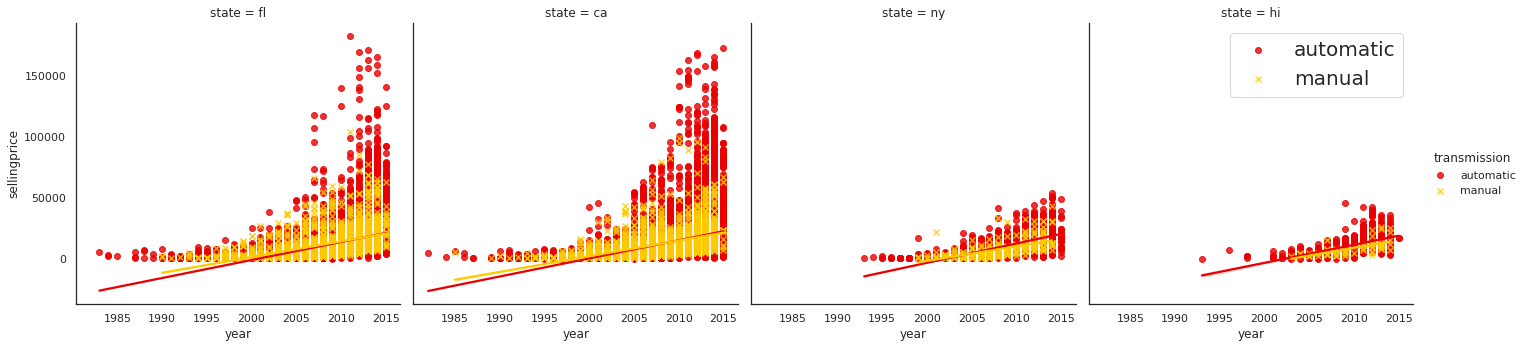

<Figure size 432x288 with 0 Axes>

In [96]:

####=======================lets sort by year=========================================================
sorted_year = raw_car_data.sort_values(by='year', ascending=True)
sorted_year
#===================================================================================================
##==============================lets sort by selling pricr===================================
selling_price = sorted_year.sort_values(by='sellingprice',ascending=False)
selling_price.head(n=100)
#=========================================================================================
state = ["fl","hi", "ca", "ny" ]
state_car_sales = selling_price[(selling_price.state.isin(state))]
state_car_sales
#-----------------------------------------------------------------------------------------------------------------------------------------
sns.lmplot(x = 'year', y = 'sellingprice',  data = state_car_sales, col='state',  hue='transmission', palette="hot" , markers=['o', 'x'] ,)
# for legend title
plt.legend(fontsize=20)
plt.show()
#==========================================================================================================================================
plt.savefig('John_Chetwynd_plt_1')

In [ ]:
# fig, ax = plt.subplots(figsize=(30,8))
# sns.lineplot(x = 'year', y = 'sellingprice', data = state_car_sales, hue='transmission' , palette="cool" , style='transmission', size='transmission', lw=4 , ci=95   )
# plt.savefig('John_Chetwynd_plt_2')

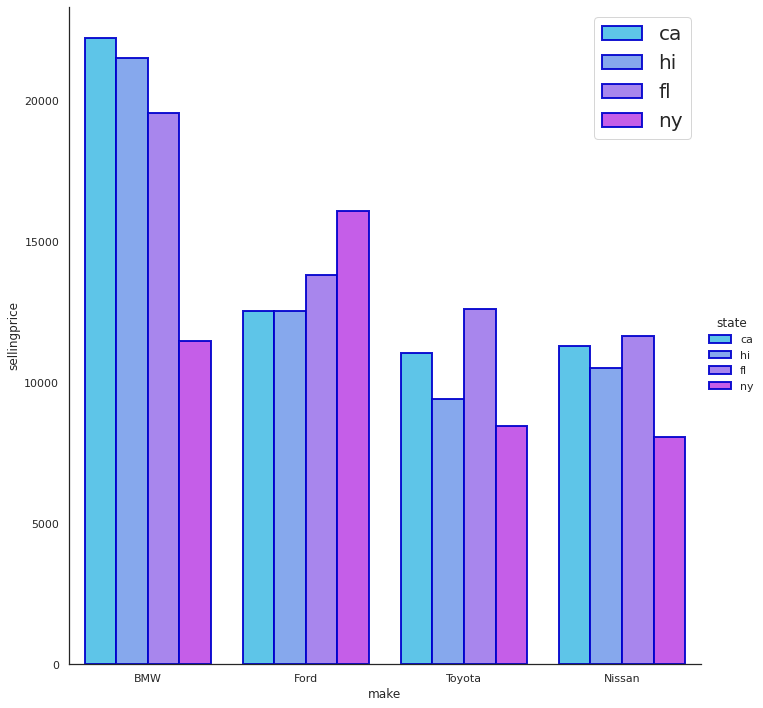

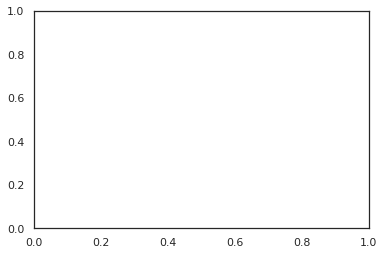

In [88]:

Car_makes = raw_car_data[(raw_car_data.make.isin(make))]
make = [
    "Ford", 
    
    "BMW", 
     
    "Nissan",
  
    "Toyota"
]

#-------------lets try and make some connections------------------------------------------
state_data = Car_makes.groupby(by=["make", "state"], as_index=False)['sellingprice'].mean()
sorted_groped_mmr = state_data.sort_values(by='sellingprice',ascending=False)
sorted_groped_mmr.head(n=100)
#==================grouped data======================================
state = [ "fl","hi", "ca", "ny"  ]
state_car_sales = sorted_groped_mmr[(sorted_groped_mmr.state.isin(state))]
state_car_sales
# #----------------------------------------------------------------------------------
# #-----------------------------letsmake a vis to rep the data by difernt cars  -------------------------------
sns.catplot(
    data=state_car_sales, kind="bar",
    x="make", y="sellingprice", hue="state",
     ci="sd", palette="cool", alpha=.9, height=10 , edgecolor='mediumblue', lw=2)

 
# for legend title
plt.legend(fontsize=20)
plt.show()
plt.title(None )
plt.ylabel(None)
plt.xlabel(None);
plt.savefig('John_Chetwynd_plt_3')

In [ ]:
# state = [ "fl","hi", "ca", "ny" ]
# state_car_sales = sorted_groped_mmr[(sorted_groped_mmr.state.isin(state))]
# #----------------------------------------------------------------------------------

# #-----------------------------letsmake a vis to rep the data  by didfernt states -------------------------------
# sns.catplot(
#     data=state_car_sales, kind="bar",
#     x="sellingprice", y="state", hue="make",
#      ci="sd", palette="dark", alpha=.9, height=10)
# plt.title("cars by state")
# plt.ylabel('Averg Selling Price')
# plt.xlabel('State');

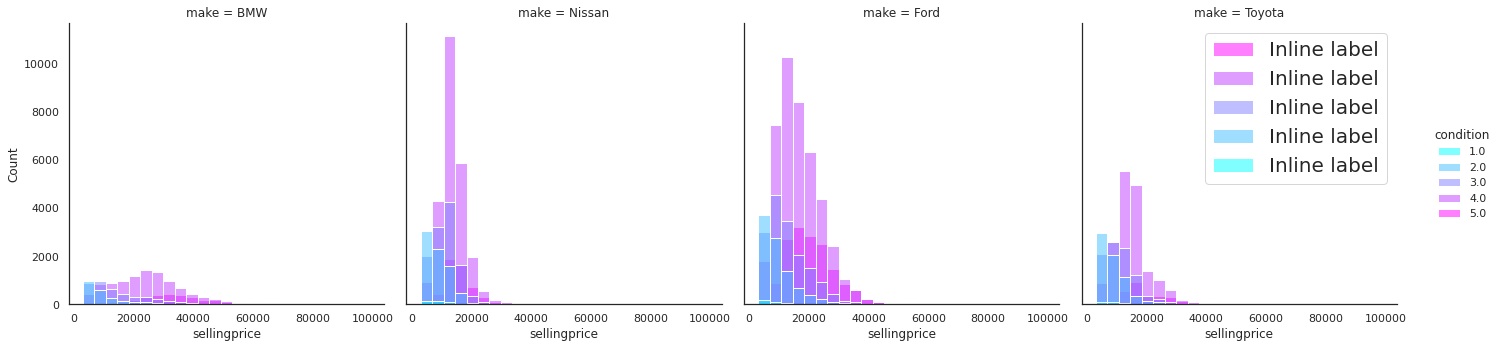

In [95]:
#--------------------------------------------------------------------------------------------------------------------
make = [
    "Ford", 
    
    "BMW", 
     
    "Nissan",
  
    "Toyota"
]
#================================================================================================
raw_car_data.condition = round(raw_car_data.condition)
#==================================================================================================

rating_car = raw_car_data[ (raw_car_data['sellingprice'] < 100000) & ( raw_car_data['sellingprice']>3000) ]
rating_car
rating_car = rating_car[(rating_car.make.isin(make)) & (rating_car.condition)]
#===========================================================================================================================
sns.displot(kind='hist' , x='sellingprice', data=rating_car, col="make", hue='condition', color='blue', bins=25, palette='cool', label='Inline label' )
# for legend title
plt.legend( fontsize=20)

#=========================================Save figure=======================================================================================
plt.savefig('John_Chetwynd_plt_4')

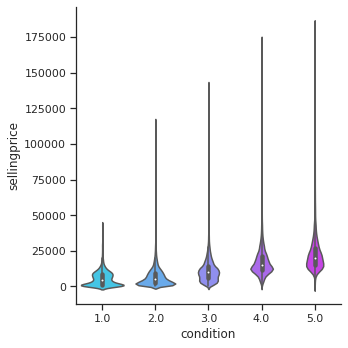

In [23]:
#=========================lets make a function to sort the bodys of the car to see wich one tens to sell for moere=======================================
make = [
    "Ford", 
    
    "BMW", 
    
    "Nissan",
  
    "Toyota"
]
raw_car_data.condition = round(raw_car_data.condition)

raw_car_data = raw_car_data[(raw_car_data.state.isin(state)) & (raw_car_data.condition)]
raw_car_data
sns.set_theme(style="ticks", palette="pastel")
sns.catplot(kind="violin",data=raw_car_data, x="condition", y="sellingprice" , ci=95 , palette='cool')
sns.set_theme(style="whitegrid")
#=========================================Save figure=======================================================================================
plt.savefig('John_Chetwynd_plt_5')



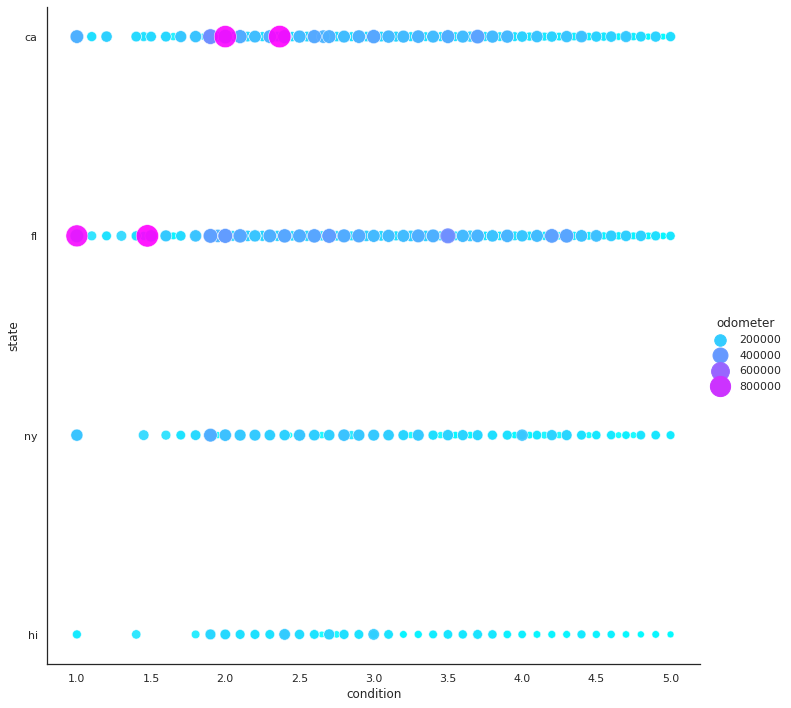

In [46]:

#-------------------------------Groupby data-----------------------------------------
#===================================================================================================
state_data = Car_makes.groupby(by=["odometer", "state"], as_index=False)['condition'].mean()
#---------------------------lets look at this--------------------------------------------
#state_data.condition = round(state_data.condition)
#==============================controle for state=======================================
state = [ "fl","hi", "ca", "ny" ]
sates_odermeder = state_data[(state_data.state.isin(state))]
# ============================condition of car bacied on state======================take out line and kind to fix it.... might have trouble understatnding the size elemente ======================
sns.set_theme(style="white")
sns.relplot(x="condition", y="state", hue="odometer", size="odometer",
           
            sizes=(40, 500), alpha=.9, palette="cool",
            height=10, data=sates_odermeder)
#=========================================Save figure=======================================================================================
plt.savefig('John_Chetwynd_plt_6')

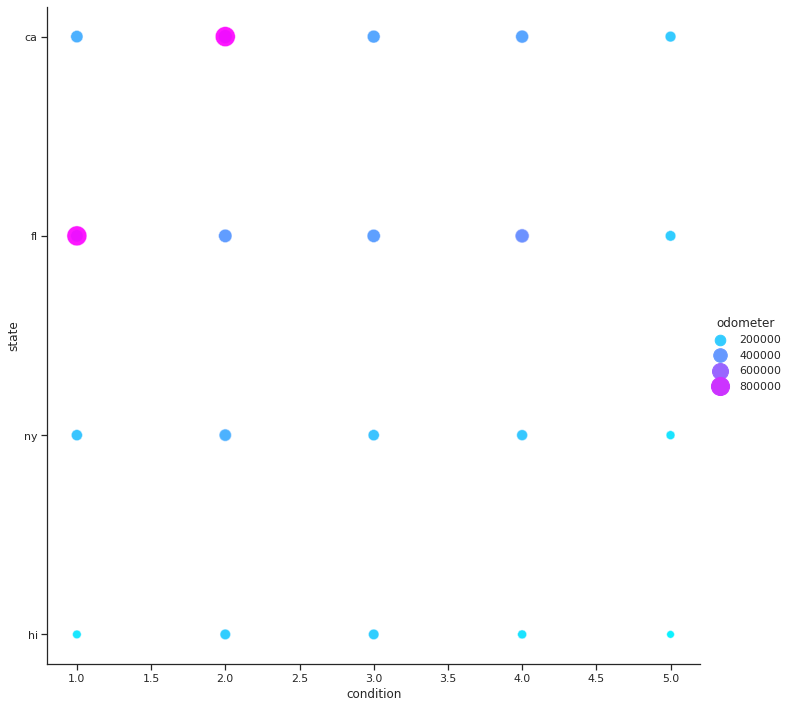

In [43]:
sns.set_theme(style="ticks")
sns.relplot(x="condition", y="state", hue="odometer", size="odometer",
           
            sizes=(40, 400), alpha=.7, palette="cool",
            height=10, data=sates_odermeder)

KeyboardInterrupt: ignored

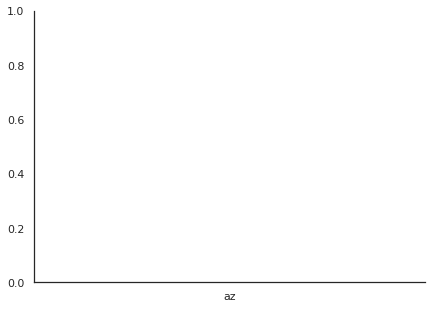

In [49]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    state_data,
    x="state", hue="odometer",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
   
)